In [32]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [309]:
fs = pd.read_csv('female.csv')
fs['gender'] = 0
ms = pd.read_csv('male.csv')
ms['gender'] = 1

,name,1,2,3,gender
0,oliver,r,e,v,1
1,joella,a,l,l,0
2,shaina,a,n,i,0
3,georgeanna,a,n,n,0
4,saxon,n,o,x,1
5,vinita,a,t,i,0
6,shirl,l,r,i,0
7,henrique,e,u,q,1
8,ephrem,m,e,r,1
9,camella,a,l,l,0


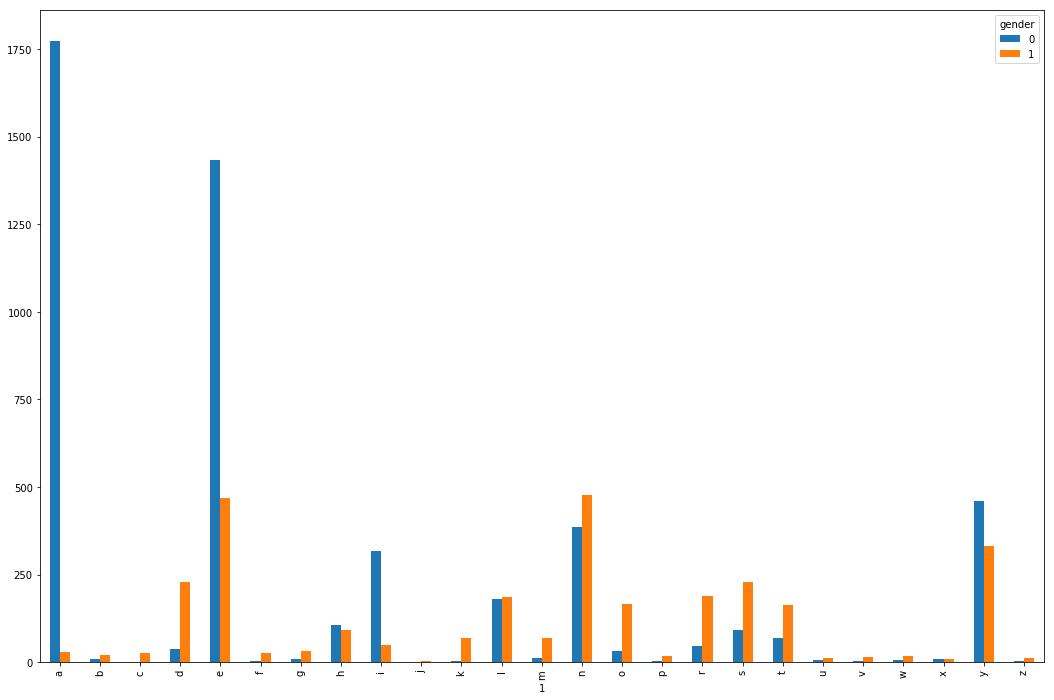

In [310]:
ns = pd.concat([ms, fs])
ns['name'] = [n.strip().lower() for n in ns['name']]
ns = ns.reset_index(drop=True)
ns = ns.reindex(np.random.permutation(ns.index))
ns = ns.reset_index(drop=True)
ns['1'] = [n[-1:   ] for n in ns['name']]
ns['2'] = [n[-2: -1] for n in ns['name']]
ns['3'] = ['_' if len(n) <=2 else n[-3:-2] for n in ns['name']]
ns['count'] = 1
genders = ns.pivot_table(index='1', columns='gender', values='count', aggfunc=np.sum, fill_value=0)
_ = genders.plot(kind='bar', figsize=[18, 12])
genders

ns[['name','1', '2', '3', 'gender']]

In [448]:
d = [{'-1-2': n[-2:], '-1-2-3': n[-3:], '-1': n[-1:], '-2': n[-2:-1], '-3': 0 if len(n) <= 2 else (n[-3:-2])} for n in ns['name']]

v = DictVectorizer(sparse=False)
x = v.fit_transform(d)


#[t for t in d if t['3'] < 0]

In [449]:
x_train, x_test, y_train, y_test = train_test_split(x, ns.gender, random_state=1, test_size=0.2)
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [450]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train).score(x_test, y_test) 

0.8099433606041535

In [457]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(max_depth=20, random_state=1)
tr.fit(x_train, y_train).score(x_test, y_test)

0.8212712397734424

In [458]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(18, 14), random_state=1)
nn.fit(x_train, y_train).score(x_test, y_test)

0.8099433606041535

## Task 2

In [12]:
happiness = pd.read_csv('happiness.csv')
happiness = happiness.loc[:, happiness.columns != 'country']
happiness

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
0,2007,4.634252,9.077331,0.821372,65.800003,0.528605,-0.014393,0.874700,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,0.303250,15.966000,2970017.0,46.3,5.980000
1,2012,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.606636,0.271393,0.364894,-0.060784,-0.328862,1.921203,0.348668,0.303250,13.376000,2900401.0,38.8,1.420000
2,2013,4.550648,9.258445,0.759477,67.239998,0.631830,-0.130645,0.862905,0.633609,0.338379,0.338095,0.070411,-0.330956,2.315580,0.508846,0.303250,15.866000,2895092.0,31.7,1.000000
3,2014,4.813763,9.278104,0.625587,67.519997,0.734648,-0.028162,0.882704,0.684911,0.334543,0.498786,0.314873,-0.187407,2.660069,0.552597,0.303250,17.490000,2889104.0,31.6,1.770000
4,2015,4.606651,9.302960,0.639356,67.800003,0.703851,-0.084411,0.884793,0.688370,0.350427,0.506978,0.251629,-0.152544,2.729001,0.592405,0.303250,17.080000,2880703.0,36.9,2.220000
5,2016,4.511101,9.337532,0.638411,68.099998,0.729819,-0.020687,0.901071,0.675244,0.321706,0.400910,0.257292,-0.134950,2.646668,0.586701,0.303250,15.220000,2876101.0,36.9,3.350000
6,2017,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,0.299945,-0.130315,2.682105,0.578096,0.303250,13.750000,2873457.0,37.3,3.835544
7,2011,5.589001,8.684613,0.723094,52.500000,0.583702,0.065088,0.911320,0.658647,0.361063,0.232387,-0.747358,-1.215250,2.212474,0.395862,0.473500,7.362000,24218565.0,52.3,3.471981
8,2012,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.557908,0.304890,0.237091,-0.732785,-1.124386,2.150746,0.493262,0.473500,7.359000,25096150.0,52.3,8.542147
9,2013,3.937107,8.730368,0.721591,53.900002,0.409555,-0.092934,0.816375,0.658284,0.370875,0.547732,-0.752538,-1.213750,2.325728,0.590720,0.473500,7.454000,25998340.0,52.6,4.954590


In [28]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [24]:
minmax_scale = preprocessing.MinMaxScaler().fit(happiness)
happiness[[c for c in happiness.columns]] = minmax_scale.transform(happiness)
happiness

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,"GINI index (World Bank estimate), average 2000-16","Unemployment, total (% of total labor force) (modeled ILO estimate)","Population, total",Total tax and contribution rate (% of profit),GDP growth (annual %)
0,0.166667,0.367801,0.523649,0.764567,0.786385,0.370338,0.308105,0.872390,0.327263,0.288078,0.242555,0.570025,0.372007,0.338456,0.277816,0.222289,0.452554,0.001981,0.117275,0.482384
1,0.583333,0.533754,0.557490,0.711498,0.813615,0.470885,0.147836,0.840628,0.420115,0.338615,0.312747,0.565744,0.393986,0.397093,0.241612,0.222289,0.377807,0.001929,0.094664,0.399624
2,0.666667,0.351960,0.559846,0.675478,0.820188,0.512697,0.190086,0.858528,0.466530,0.473709,0.283453,0.601575,0.393481,0.545089,0.421819,0.222289,0.449668,0.001925,0.073259,0.392001
3,0.750000,0.401813,0.563775,0.482763,0.826760,0.654494,0.294128,0.881798,0.554810,0.465973,0.459107,0.668341,0.428090,0.674364,0.471039,0.222289,0.496537,0.001921,0.072957,0.405976
4,0.833333,0.362571,0.568742,0.502582,0.833333,0.612021,0.237023,0.884253,0.560763,0.498007,0.468062,0.651068,0.436496,0.700231,0.515825,0.222289,0.484704,0.001915,0.088936,0.414143
5,0.916667,0.344467,0.575652,0.501223,0.840376,0.647834,0.301716,0.903384,0.538175,0.440084,0.352117,0.652615,0.440737,0.669335,0.509408,0.222289,0.431025,0.001911,0.088936,0.434652
6,1.000000,0.368804,0.583369,0.500196,0.847418,0.675129,0.289579,0.874077,0.527846,0.464645,0.414236,0.664264,0.441855,0.682633,0.499727,0.222289,0.388600,0.001909,0.090142,0.443464
7,0.500000,0.548699,0.445162,0.623111,0.474178,0.446323,0.388796,0.915430,0.509615,0.519459,0.167902,0.378230,0.180282,0.506397,0.294707,0.632530,0.204242,0.017852,0.135363,0.436866
8,0.583333,0.315885,0.448137,0.665570,0.490610,0.270248,0.196766,0.909531,0.336263,0.406171,0.173044,0.382210,0.202189,0.483233,0.404286,0.632530,0.204156,0.018507,0.135363,0.528885
9,0.666667,0.235712,0.454306,0.620947,0.507042,0.206156,0.228370,0.803842,0.508991,0.539247,0.512611,0.376815,0.180644,0.548897,0.513930,0.632530,0.206898,0.019181,0.136268,0.463774


AttributeError: 'numpy.ndarray' object has no attribute 'ix'

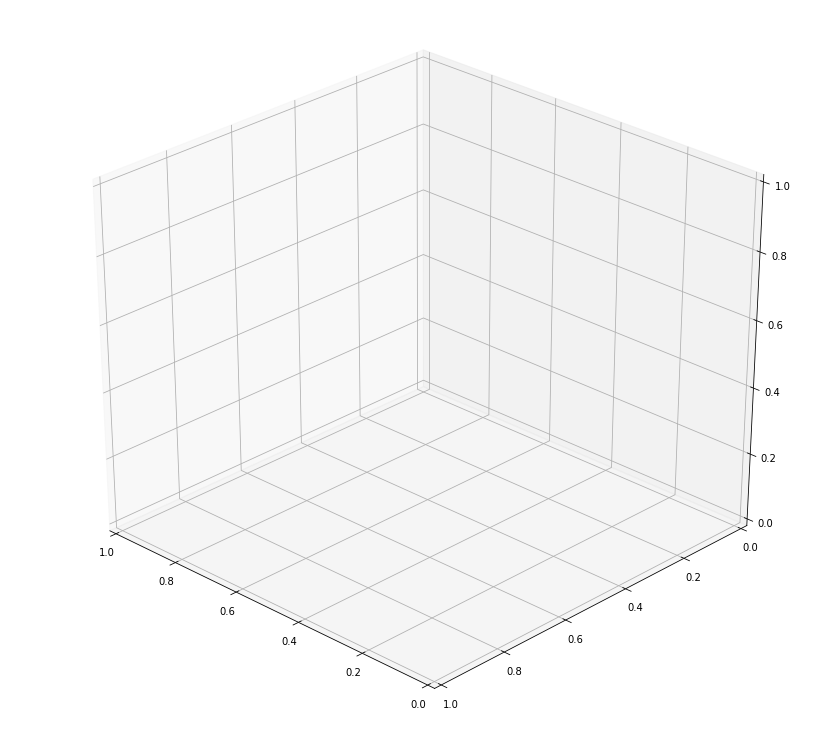

In [33]:
km = KMeans(n_clusters=3, init='random')

km.fit(happiness[['year','Life Ladder', 'Log GDP per capita']].values)

predictions = km.predict(happiness[['year','Life Ladder', 'Log GDP per capita']].values)

metrics.silhouette_score(happiness[['year','Life Ladder', 'Log GDP per capita']], predictions)



#colors = np.array(['green', 'black', 'blue', 'brown'])

ax = Axes3D(plt.figure(figsize=(12, 10)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(scaled.ix[:,'year'], beer_df.ix[:,'Life Ladder'], beer_df.ix[:,'Log GDP per capita'], c = predictions, s=200)
ax.set_xlabel(scaled.columns[1])
ax.set_ylabel(scaled.columns[2])
ax.set_zlabel(scaled.columns[3])    
ax.set_title('Include a title relevant to your plot', fontsize = 20)
